In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [2]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats

In [3]:
#  Step 2: Load Dataset
df = pd.read_csv('D:/AI_Intern/ScreenTime vs MentalWellness.csv')

In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social

In [5]:
print("\nNull Values:")
print(df.isnull().sum())


Null Values:
user_id                          0
age                              0
gender                           0
occupation                       0
work_mode                        0
screen_time_hours                0
work_screen_hours                0
leisure_screen_hours             0
sleep_hours                      0
sleep_quality_1_5                0
stress_level_0_10                0
productivity_0_100               0
exercise_minutes_per_week        0
social_hours_per_week            0
mental_wellness_index_0_100      0
Unnamed: 15                    400
dtype: int64


In [6]:
print("\n📊 Descriptive Stats:")
print(df.describe(include='all'))


📊 Descriptive Stats:
       user_id        age  gender occupation work_mode  screen_time_hours  \
count      400  400.00000     400        400       400         400.000000   
unique     400        NaN       3          5         3                NaN   
top      U0384        NaN  Female   Employed    Remote                NaN   
freq         1        NaN     222        207       150                NaN   
mean       NaN   29.77750     NaN        NaN       NaN           9.024900   
std        NaN    7.46608     NaN        NaN       NaN           2.491058   
min        NaN   16.00000     NaN        NaN       NaN           1.000000   
25%        NaN   24.00000     NaN        NaN       NaN           7.372500   
50%        NaN   30.00000     NaN        NaN       NaN           9.090000   
75%        NaN   35.00000     NaN        NaN       NaN          10.495000   
max        NaN   60.00000     NaN        NaN       NaN          19.170000   

        work_screen_hours  leisure_screen_hours  slee

In [ ]:
# Step 4: Handle Missing Values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
#  Step 5: Encode Categorical Features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
#  Step 6: Normalize Numerical Features
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

C:\Users\KHUSHI COMPUTERS\AppData\Local\Temp\ipykernel_10064\4245975794.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=num_cols, patch_artist=True)


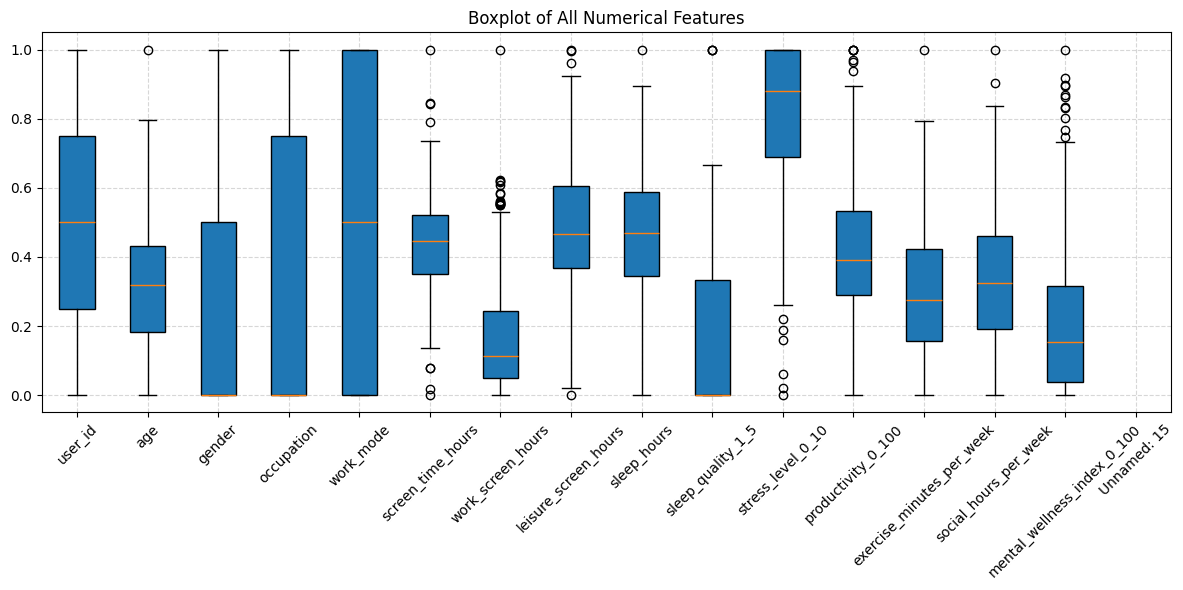

In [17]:
# Plot boxplots
plt.figure(figsize=(12, 6))
plt.boxplot(df, labels=num_cols, patch_artist=True)
plt.title('Boxplot of All Numerical Features')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

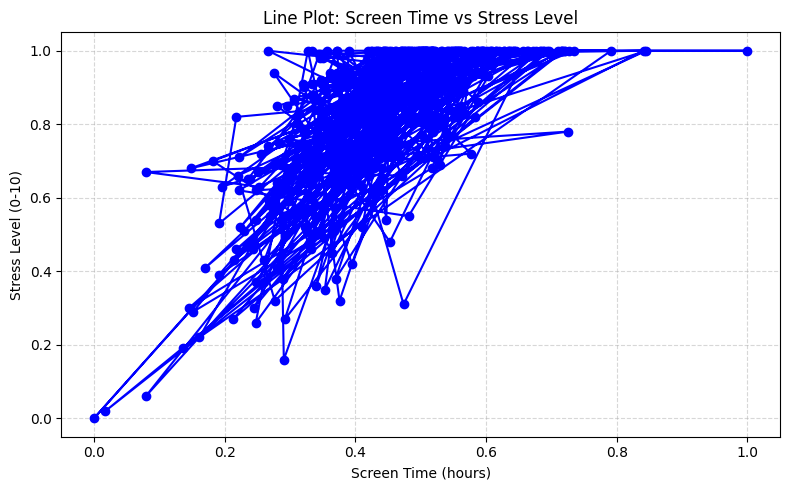

In [11]:
# Line Plot
plt.figure(figsize=(8, 5))
plt.plot(df['screen_time_hours'], df['stress_level_0_10'], color='blue', marker='o', linestyle='-')
plt.title('Line Plot: Screen Time vs Stress Level')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

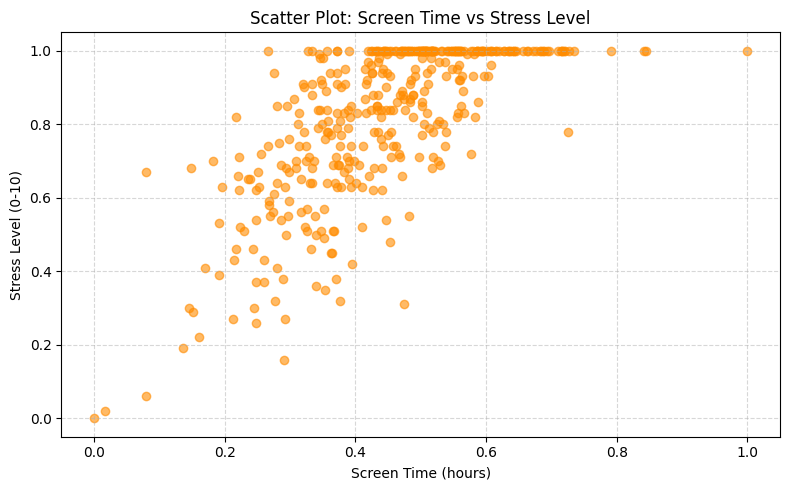

In [12]:
# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['screen_time_hours'], df['stress_level_0_10'], alpha=0.6, color='darkorange')
plt.title('Scatter Plot: Screen Time vs Stress Level')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import zscore

In [ ]:
# Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers column-by-column using Z-score
df_clean = df.copy()
for col in num_cols:
    z = zscore(df_clean[col])
    df_clean = df_clean[(abs(z) < 3) | (df_clean[col].isnull())]  

C:\Users\KHUSHI COMPUTERS\AppData\Local\Temp\ipykernel_10064\1605759328.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_clean[col] for col in num_cols], labels=num_cols, patch_artist=True)


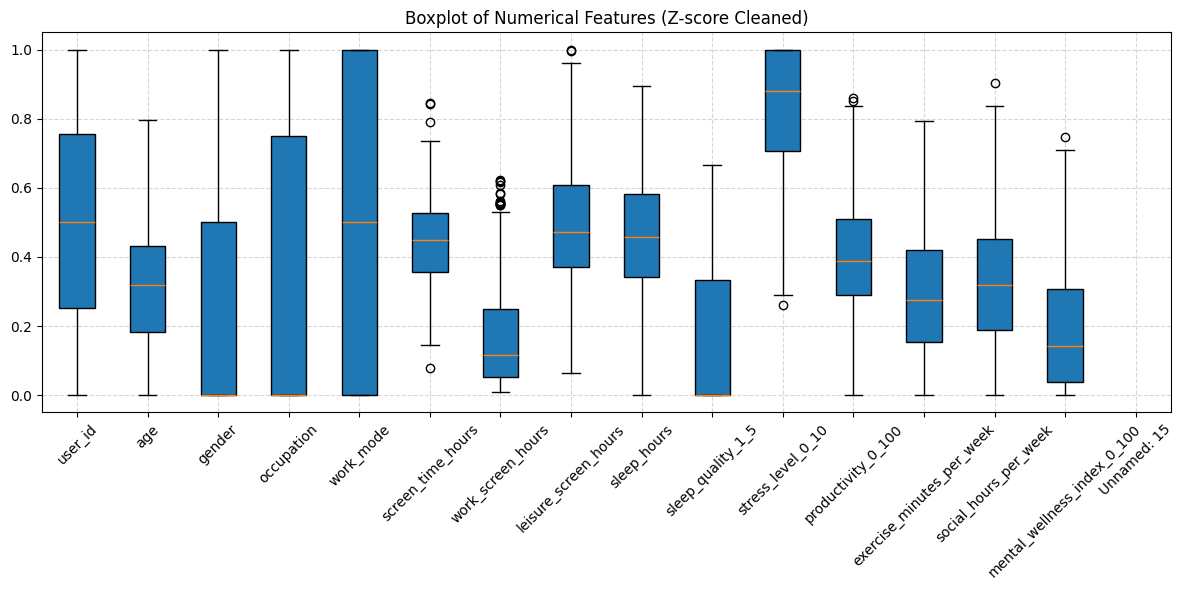

In [15]:
# Plot all boxplots in one graph after outlier removal

plt.figure(figsize=(12, 6))
plt.boxplot([df_clean[col] for col in num_cols], labels=num_cols, patch_artist=True)
plt.title('Boxplot of Numerical Features (Z-score Cleaned)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

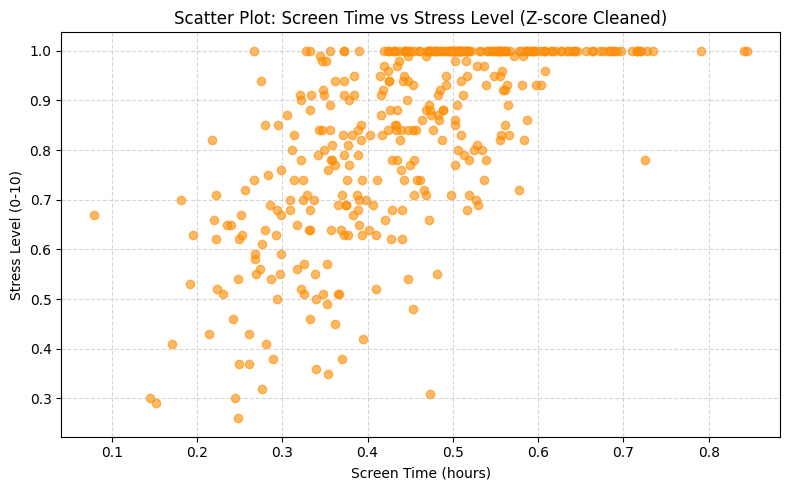

In [16]:
# Scatter Plot after outlier removal
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['screen_time_hours'], df_clean['stress_level_0_10'],
            alpha=0.6, color='darkorange')
plt.title('Scatter Plot: Screen Time vs Stress Level (Z-score Cleaned)')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()